In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [38]:
np.random.seed(1)

data = { 
    'total_bill': np.random.normal(loc=20, scale=5, size=200).tolist() + [120, 130, 140],
    'tip': np.random.normal(loc=3, scale=1, size=200).tolist() + [20, 25, 30]
}

df = pd.DataFrame(data)

In [39]:
# Calculating the z-score
df['z_score_total_bill'] = np.abs(zscore(df['total_bill']))
df['z_score_tip'] = np.abs(zscore(df['tip']))

# Identifying the outliers
z_threshold = 3
outliers_z_total_bill = df[df['z_score_total_bill'] > z_threshold]
outliers_z_tip = df[df['z_score_tip'] > z_threshold]

In [40]:
# Calculating IQR for total_bill
Q1_total_bill = df['total_bill'].quantile(0.25)
Q3_total_bill = df['total_bill'].quantile(0.75)
IQR_total_bill = Q3_total_bill - Q1_total_bill

# Calculating IQR for tip
Q1_tip = df['tip'].quantile(0.25)
Q3_tip = df['tip'].quantile(0.75)
IQR_tip = Q3_tip - Q1_tip

# Identifying outliers
lower_bound_total_bill = Q1_total_bill - 1.5 * IQR_total_bill
upper_bound_total_bill = Q3_total_bill + 1.5 * IQR_total_bill
outliers_iqr_total_bill = df[(df['total_bill'] < lower_bound_total_bill) | (df['total_bill'] > upper_bound_total_bill)]

lower_bound_tip = Q1_tip - 1.5 * IQR_tip
upper_bound_tip = Q3_tip + 1.5 * IQR_tip
outliers_iqr_tip = df[(df['tip'] < lower_bound_tip) | (df['tip'] > upper_bound_tip)]

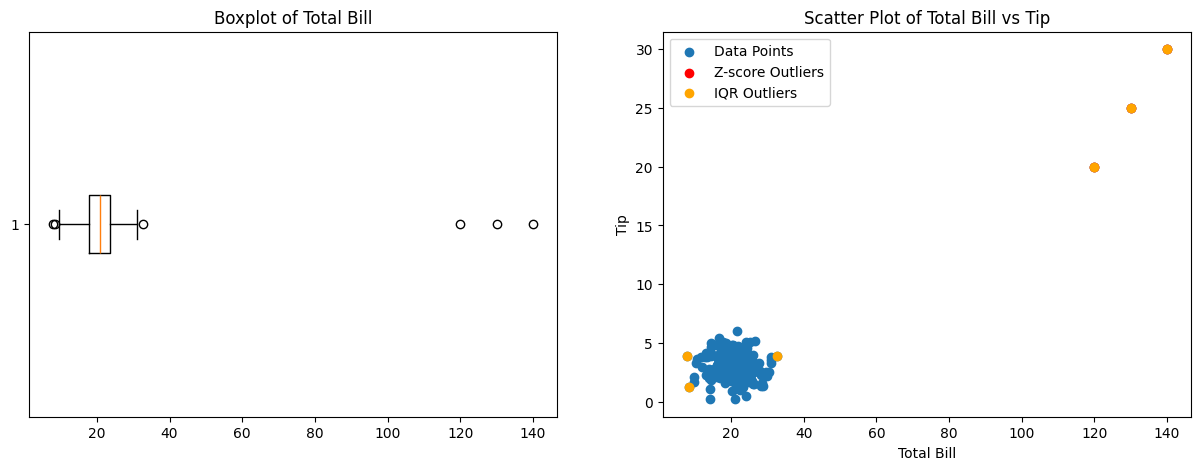

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot for total_bill
axes[0].boxplot(df['total_bill'], vert=False)
axes[0].set_title('Boxplot of Total Bill')

# Scatter plot for total_bill vs tip
axes[1].scatter(df['total_bill'], df['tip'], label='Data Points')
axes[1].scatter(outliers_z_total_bill['total_bill'], outliers_z_total_bill['tip'], color='red', label='Z-score Outliers')
axes[1].scatter(outliers_iqr_total_bill['total_bill'], outliers_iqr_total_bill['tip'], color='orange', label='IQR Outliers')
axes[1].set_xlabel('Total Bill')
axes[1].set_ylabel('Tip')
axes[1].set_title('Scatter Plot of Total Bill vs Tip')
axes[1].legend()

plt.show()

In [42]:
# Display outliers
outliers_z_total_bill[['total_bill', 'tip']]
outliers_iqr_total_bill[['total_bill', 'tip']]

,total_bill,tip
5,8.492307,1.239311
151,7.825811,3.920018
172,32.641629,3.853281
200,120.000000,20.000000
201,130.000000,25.000000
202,140.000000,30.000000
